In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
# Define the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten layer
model.add(layers.Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(64, activation='relu'))  # Additional Dense layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer with softmax activation

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1200/1200 [==============================] - 13s 9ms/step - loss: 0.6861 - accuracy: 0.7522 - val_loss: 0.4758 - val_accuracy: 0.8219
Epoch 2/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.5110 - accuracy: 0.8130 - val_loss: 0.4164 - val_accuracy: 0.8453
Epoch 3/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.4734 - accuracy: 0.8268 - val_loss: 0.3942 - val_accuracy: 0.8499
Epoch 4/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.4522 - accuracy: 0.8371 - val_loss: 0.3951 - val_accuracy: 0.8530
Epoch 5/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.4326 - accuracy: 0.8401 - val_loss: 0.3666 - val_accuracy: 0.8640
Epoch 6/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.4202 - accuracy: 0.8457 - val_loss: 0.3604 - val_accuracy: 0.8665
Epoch 7/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.4034 - accuracy: 0.8521 - val_loss: 0.3562 - val_accura

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

375/375 [==============================] - 2s 6ms/step - loss: 0.3399 - accuracy: 0.8756
Test accuracy: 87.56%


In [9]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

375/375 [==============================] - 2s 5ms/step


In [10]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.56%


In [11]:
# Generate a confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Confusion Matrix:
[[ 972    3   19   63    3    0  140    0    2    0]
 [   0 1193    2   19    2    0    2    0    1    0]
 [   9    0  968   17  144    0   66    0    1    0]
 [  19   17    6 1076   51    0   10    0    5    0]
 [   0    0   96   34 1005    0   61    0    6    0]
 [   0    0    0    0    0 1173    0   25    2   11]
 [ 157    3  123   48  133    1  740    0   13    0]
 [   0    0    0    0    0   29    0 1091    0   39]
 [   1    1   11    5    8    9   15    4 1142    1]
 [   0    0    0    0    0   22    0   34    0 1147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1202
           1       0.98      0.98      0.98      1219
           2       0.79      0.80      0.80      1205
           3       0.85      0.91      0.88      1184
           4       0.75      0.84      0.79      1202
           5       0.95      0.97      0.96      1211
           6       0.72      0.61      0.66      

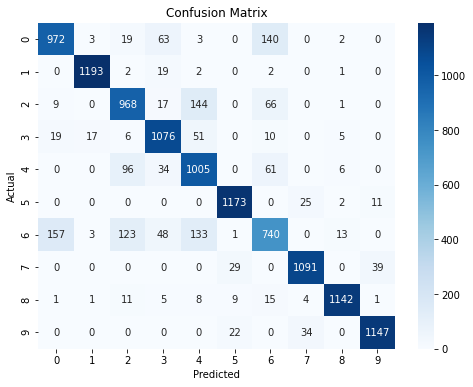

In [12]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()